In [6]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


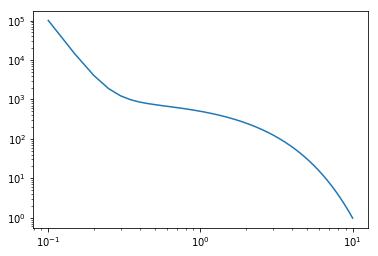

In [3]:
x = np.linspace(0.1,10,200)
fitfunc = lambda x, a1, i1, a2, i2: a1*(x**-i1) + a2*(i2**-x)
y = fitfunc(x, 1, 5, 1000, 2)
plt.loglog(x,y)
plt.show()

This is a very cool shape - and is similar to vacf.


G: -_-

In [27]:
x1,y1 = np.load("G_data/vcor_full.npy")

In [51]:
x,y,ye = np.load("G_data/vcor.npy")

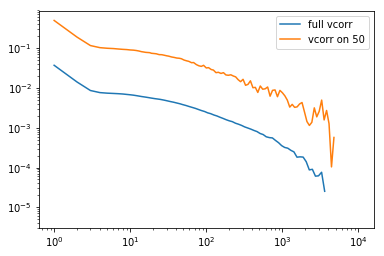

In [52]:
plt.loglog(x1,y1,'-',label='full vcorr')
plt.loglog(x,y,label='vcorr on 50')
plt.legend()

In [53]:
plaw = lambda x, x0,a,b: b*(x-x0)**a

def plot_fit(x,y):
    popt, pcov = curve_fit(plaw, x, y,p0=(-1,-.8,1e-2))    # This works better in Jureca for some reason. 
    yopt = plaw(x, *popt)
    plt.loglog(x,y)
    plt.loglog(x, yopt, c='k')
    perr = np.sqrt(np.diag(pcov))

/home/astyonax/.anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


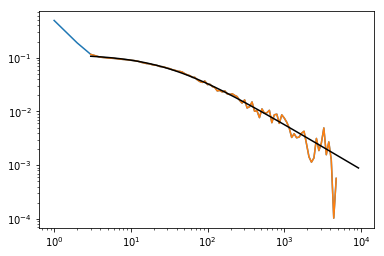

In [55]:
plt.plot(x,y)
plot_fit(x[2:],y[2:])
